In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import re

In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\

##### Read features as dataframes

In [2]:
year_range = [f'{i}_{i+2}' for i in range(1990,2020,3)]

In [4]:
region_en = 'huadong'

In [5]:
# import the points with image values 
feature_df = [pd.read_csv(f'./Data/Training_sample_{region_en}_{year}.csv') for year in year_range]

# merge all pt_with_img and remove unnecessary columns
feature_df = [fe.drop(['system:index','.geo'],axis=1) for fe in feature_df]

##### train_test_split and apply randomforest_classifier

In [6]:
Sample_acc = {}

for year,fe in zip(year_range,feature_df):
    
    # _______________________________Different band combination_______________________________
    
    col_name = ''.join(fe.columns)
    
    # find the spectrum band names
    Spectrum_reg = re.compile(r'(B6_VCID_\d|B\d{1,2}|Landsat_B\d{1,2}|Sentinel_B\d{1,2}A?)')
    Spectrum_reg_bands = Spectrum_reg.findall(col_name)
    
    # find the Mean-nomalized names
    Mean_nomalize_bands = ['NDVI','NDBI','EVI']
    
    # find the Fourire names
    Fourier_reg   = re.compile(r'((EVI|NDBI|NDVI)_(constant|\w{3}_\d))')
    Fourier_bands = [i[0] for i in Fourier_reg.findall(col_name)]
    
    # get the terrain bands
    Terrain_bands = ['DEM','SLOPE']
    
    # get the meterology bands
    Meterology_bands = ['lrad', 'prec', 'pres', 'shum', 'srad', 'temp', 'wind']

    
    #_________________________________Assess the accuracy ______________________________________
    
    bands_in = zip(['Spectrum',
                    'Spectrum_Normalize',
                    'Spectrum_Normalize_Fourier',
                    'Spectrum_Normalize_Fourier_Terrain',
                    'Spectrum_Normalize_Fourier_Terrain_Meterology'],
                   
                   [Spectrum_reg_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands + Terrain_bands,
                    Spectrum_reg_bands + Mean_nomalize_bands + Fourier_bands + Terrain_bands + Meterology_bands])
    
    # each_year_band_combination[year] =  list(bands_in)
    
    # ________________________Grid search to compare the accuracy under different input bands__________
    
    for band_name, bands_select in bands_in:
        
        # get the X and y
        X_train = fe[bands_select]
        y_train = fe['Built']
        
        # import testing sample
        test_sample = pd.read_csv(f'./Data/Grid_select_{region_en}_{year}.csv')
        test_sample = test_sample.drop(['system:index','.geo'],axis=1)
        # get the X,y value
        X_test = test_sample.drop('Built',1)[bands_select]
        y_test = test_sample['Built']     
        
        
        # _______________________Grid search to compare the accuracy under different trees__________
        
        for tree in range(1,121):

            # perform the RF classification
            RF = RandomForestClassifier(n_estimators=tree,n_jobs=-1)
            RF.fit(X_train,y_train)
            y_pred = RF.predict(X_test)

            # get the accuracy, here get two kinds of accuracy
            acc_test = accuracy_score(y_test,y_pred)

            # add results to the acc_dict
            Sample_acc[(year,band_name,tree)] = [acc_test]

            # print out the process
            print(f'Accuracy calculation of {region_en}_{year}_{band_name}_{tree} finished!')
        

Accuracy calculation of huadong_1990_1992_Spectrum_1 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_2 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_3 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_4 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_5 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_6 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_7 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_8 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_9 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_10 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_11 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_12 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_13 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_14 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_15 finished!
Accuracy calculation of huadong_1990_1992_Spectru

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_8 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_9 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_10 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_11 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1990_199

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_119 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_120 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_1 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_2 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1990_19

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_100 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_101 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_102 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_111 finished!
Accu

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_73 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_74 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_75 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy c

Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_40 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_41 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1990_1992_Spectrum_Normalize_Fourier_Terrain_Meterology_49 

Accuracy calculation of huadong_1993_1995_Spectrum_2 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_3 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_4 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_5 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_6 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_7 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_8 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_9 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_10 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_11 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_12 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_13 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_14 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_15 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_16 finished!
Accuracy calculation of huadong_1993_1995_Spectr

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_9 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_10 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_11 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_1993_19

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_120 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_1 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_2 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_101 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_102 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_112 finished!
Accu

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_74 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_75 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy c

Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_41 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_1993_1995_Spectrum_Normalize_Fourier_Terrain_Meterology_50 

Accuracy calculation of huadong_1996_1998_Spectrum_3 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_4 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_5 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_6 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_7 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_8 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_9 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_10 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_11 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_12 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_13 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_14 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_15 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_16 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_17 finished!
Accuracy calculation of huadong_1996_1998_Spect

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_10 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_11 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_1996_1

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_2 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of 

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_102 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_113 finished!
Accu

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_75 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy c

Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_1996_1998_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_1999_2001_Spectrum_5 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_6 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_7 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_8 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_9 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_10 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_11 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_12 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_13 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_14 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_15 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_16 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_17 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_18 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_19 finished!
Accuracy calculation of huadong_1999_2001_Spe

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_1999_2

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_1999_2001_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2002_2004_Spectrum_5 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_6 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_7 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_8 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_9 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_10 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_11 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_12 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_13 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_14 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_15 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_16 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_17 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_18 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_19 finished!
Accuracy calculation of huadong_2002_2004_Spe

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2002_2

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2002_2004_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2005_2007_Spectrum_5 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_6 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_7 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_8 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_9 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_10 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_11 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_12 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_13 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_14 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_15 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_16 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_17 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_18 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_19 finished!
Accuracy calculation of huadong_2005_2007_Spe

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2005_2

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2005_2007_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2008_2010_Spectrum_5 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_6 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_7 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_8 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_9 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_10 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_11 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_12 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_13 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_14 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_15 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_16 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_17 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_18 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_19 finished!
Accuracy calculation of huadong_2008_2010_Spe

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2008_2

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2008_2010_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2011_2013_Spectrum_5 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_6 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_7 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_8 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_9 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_10 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_11 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_12 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_13 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_14 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_15 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_16 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_17 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_18 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_19 finished!
Accuracy calculation of huadong_2011_2013_Spe

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2011_2

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2011_2013_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2014_2016_Spectrum_5 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_6 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_7 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_8 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_9 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_10 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_11 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_12 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_13 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_14 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_15 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_16 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_17 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_18 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_19 finished!
Accuracy calculation of huadong_2014_2016_Spe

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2014_2

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2014_2016_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

Accuracy calculation of huadong_2017_2019_Spectrum_5 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_6 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_7 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_8 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_9 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_10 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_11 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_12 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_13 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_14 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_15 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_16 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_17 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_18 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_19 finished!
Accuracy calculation of huadong_2017_2019_Spe

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_12 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_13 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_14 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_15 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_16 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_17 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_18 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_19 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_20 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_21 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_22 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_23 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_24 finished!
Accuracy calculation of huadong_2017_2

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_3 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_4 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_5 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_6 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_7 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_8 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_9 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_10 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_11 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_12 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_13 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_14 finished!
Accuracy calculation of

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_103 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_104 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_105 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_106 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_107 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_108 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_109 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_110 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_111 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_112 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_113 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_114 finished!
Accu

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_76 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_77 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_78 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_79 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_80 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_81 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_82 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_83 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_84 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_85 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_86 finished!
Accuracy c

Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_42 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_43 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_44 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_45 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_46 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_47 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_48 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_49 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_50 finished!
Accuracy calculation of huadong_2017_2019_Spectrum_Normalize_Fourier_Terrain_Meterology_51 

##### Save the grid_acc  to disk

In [9]:
grid_acc = pd.DataFrame(Sample_acc).T
grid_acc.reset_index(inplace=True)
grid_acc.columns = ['Year','In_Bands','Tree','Accuracy']
grid_acc.to_csv(f'./Result/Grid_acc_tree_{region_en}.csv',index = False)

# load the grid_acc
grid_acc = pd.read_csv(f'./Result/Grid_acc_tree_{region_en}.csv')
grid_acc['Year'] = grid_acc['Year'].astype('category')

In [10]:
grid_acc = pd.read_csv(f'./Result/Grid_acc_tree_{region_en}.csv')
grid_acc['Year'] = grid_acc['Year'].astype('category')

##### Observe that the tree number of 100 is enough for classification

C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<AxesSubplot:xlabel='Tree', ylabel='Accuracy'>

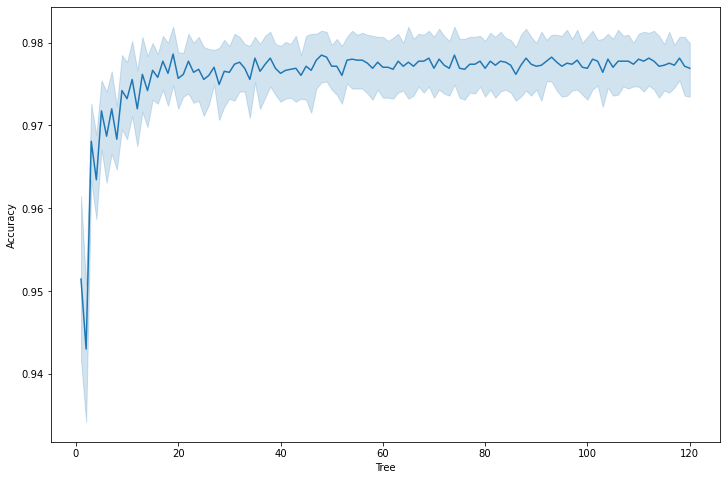

In [11]:
plt.figure(figsize=(12,8))
sns.lineplot(data = grid_acc[grid_acc['In_Bands']=='Spectrum_Normalize_Fourier_Terrain_Meterology'],
             x='Tree',
             y='Accuracy')

##### Observe that the Fourier bands significant increases the accuracy

C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexin

<AxesSubplot:xlabel='Year', ylabel='Accuracy'>

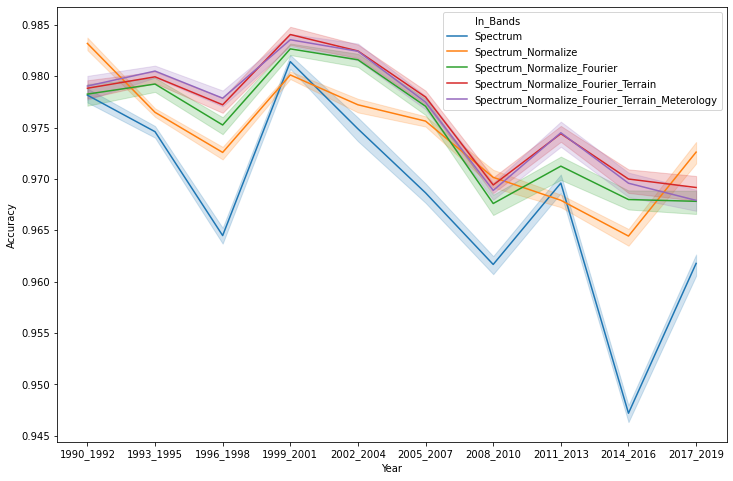

In [12]:
plt.figure(figsize=(12,8))
sns.lineplot(data = grid_acc,
             x='Year',
             y='Accuracy',
             hue = 'In_Bands')

##### Compare all region's accuracy

In [21]:
All_accuracy = []

for region in ['dongbei','huadong','zhongnan','xinan','xibei','huabei','NCP']:
    
    df = pd.read_csv(f'./Result/Grid_acc_tree_{region}.csv')
    df['Region'] = region
    All_accuracy.append(df)

FileNotFoundError: [Errno 2] No such file or directory: './Result/Grid_acc_tree_dongbei.csv'

In [15]:
All_accurac_df = pd.concat(All_accuracy,0)
All_accurac_df_tree_100 = All_accurac_df[All_accurac_df['Tree'] == 100]

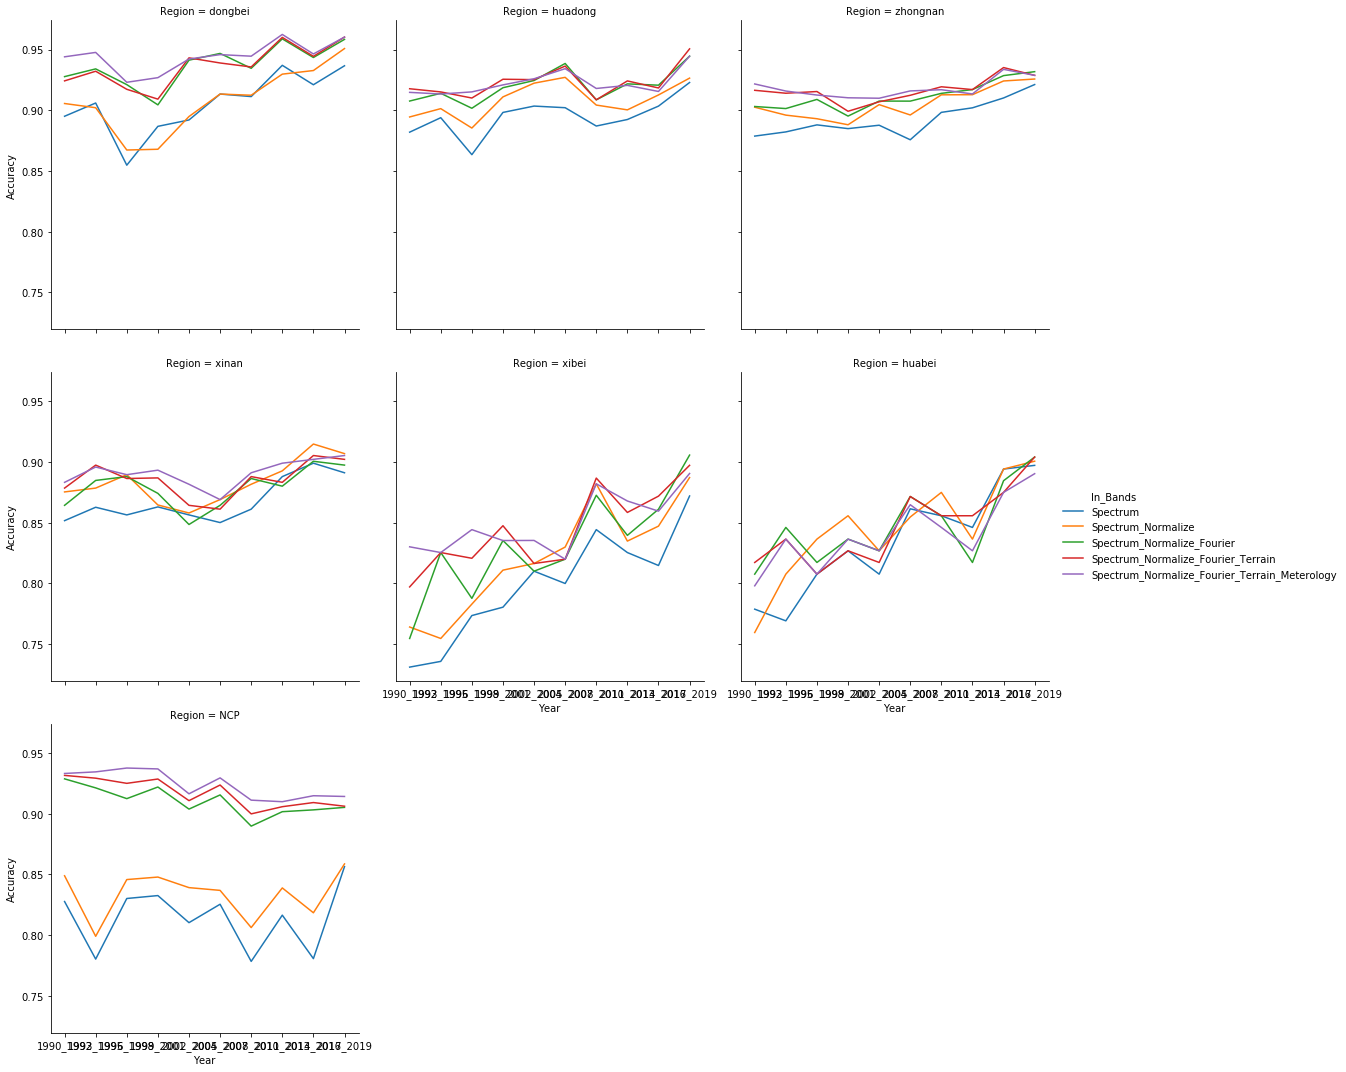

In [16]:
sns.relplot(data=All_accurac_df_tree_100,x='Year',y='Accuracy',hue='In_Bands',col='Region',kind="line",col_wrap=3)